In [1]:
!pip install gdown

!pip install Cython --install-option="--no-cython-compile"
!pip install fasttext

/usr/local/lib/python3.6/dist-packages/pip/_internal/commands/install.py:283: UserWarning: Disabling all use of wheels due to the use of --build-options / --global-options / --install-options.
  cmdoptions.check_install_build_global(options)
     |████████████████████████████████| 71kB 3.3MB/s 
  Created wheel for fasttext: filename=fasttext-0.9.2-cp36-cp36m-linux_x86_64.whl size=3043073 sha256=0e05b4901a1e7c38079b26147c4b8eec2843472d9b37db6bef9b27c054c1ed9c
  Stored in directory: /root/.cache/pip/wheels/98/ba/7f/b154944a1cf5a8cee91c154b75231136cc3a3321ab0e30f592
Successfully built fasttext


In [2]:
!gdown https://drive.google.com/uc?id=1TQv6oGf3uySrXGkB4iT__4wgycVadH8F
!gdown https://drive.google.com/uc?id=12-zJnHZaRNlHweeBOk0t2yHbkyvFRsf1

Downloading...
From: https://drive.google.com/uc?id=1TQv6oGf3uySrXGkB4iT__4wgycVadH8F
To: /content/train.csv
3.96MB [00:00, 127MB/s]
Downloading...
From: https://drive.google.com/uc?id=12-zJnHZaRNlHweeBOk0t2yHbkyvFRsf1
To: /content/test.csv
100% 1.09M/1.09M [00:00<00:00, 71.5MB/s]


In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#some libraries cause this future warnings when the newer versions will be released. To prevent showing them, this code is used.

# FASTTEXT OVERVIEW

In [4]:
# download pre-trained language word vectors from one of 157 languages  https://fasttext.cc/docs/en/crawl-vectors.html
# it will take some time, about 10 minutes
import fasttext
import fasttext.util
fasttext.util.download_model('en', if_exists='ignore')  # English
ft = fasttext.load_model('cc.en.300.bin')

All word vectors are 300 dimensional dense vectors. It is possible to shrink the dimension to 100 with ``` fasttext.util.reduce_model(ft, 100) ``` We use the 300d vectors. If you try out the 50d or 100d vectors, they basically work for similarity fastly but clearly aren't as good for analogy problems compared to 300d vectors. 

In [192]:
ft.get_word_vector('king').shape

(300,)

Thanks to these dense vectors, semantic and syntactic similarities can be captured between the words because the similar word vectors are closer to each other in the 300-d vector space compared to different words

In [193]:
ft.get_nearest_neighbors('cat', k=3) #top 3 similar word for cat: as seen, cats (syntactic similarity) and kitty & kitten (semantic similarity)

[(0.8350069522857666, 'cats'),
 (0.8233457207679749, 'kitty'),
 (0.8083016276359558, 'kitten')]

In [194]:
ft.get_nearest_neighbors('Amsterdam',k=3)

[(0.8339820504188538, 'Rotterdam'),
 (0.7707010507583618, 'Utrecht'),
 (0.768132746219635, 'Antwerp')]

By utilizing this relationships, it is possible to create both syntactic and semantic analogies.

In [195]:
#semantic analogies
ft.get_analogies('france', 'paris', 'berlin',k=1)

[(0.7329395413398743, 'germany')]

In [196]:
#syntactic analogies
ft.get_analogies('good', 'best', 'worst',k=1)

[(0.7914756536483765, 'bad')]

Let's see the words and their positions in the 2-dimensional vector space by using dimension reduction techniques (PCA)!

In [197]:
import numpy as np
from sklearn.decomposition import PCA
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def display_pca_scatterplot(model, words):
       
    word_vectors = np.array([model.get_word_vector(w) for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(16,16))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)
    plt.show()



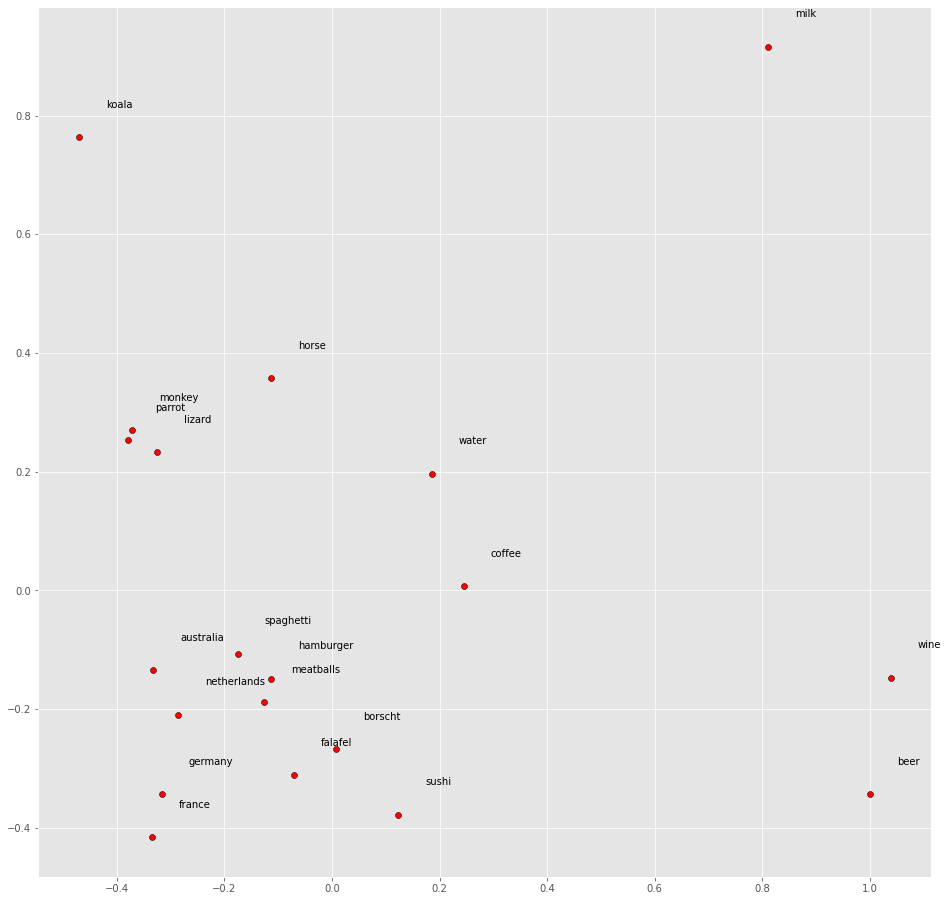

In [198]:
words=['coffee', 'milk', 'beer', 'wine', 'water',
      'spaghetti', 'borscht', 'hamburger', 'falafel', 'sushi', 'meatballs',
       'horse', 'monkey', 'parrot', 'koala', 'lizard',
      'france', 'germany', 'netherlands', 'australia']
display_pca_scatterplot(ft,words)

#  AMAZON MUSIC INSTRUMENTS - REVEWS AND RATINGS DATASET

Original Amazon Musical Instruments dataset contains around 230K reviews and ratings. However, training the model with this amount takes a lot of time. Therefore, we previously prepare the data as highly balanced and smaller size. The reason for that **handling imbalanced data is advanced topic, if you are interestedn in this, [you can follow this paper.](https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=5128907)** The script includes data preparation steps will be shared with participants after the workshop.

In [199]:
import pandas as pd
df_train = pd.read_csv(r"train.csv",index_col=[0])
# Report the number of sentences.
print('Number of training sentences: {:,}\n'.format(df_train.shape[0]))
print()
print(df_train["label"].value_counts())
df_test = pd.read_csv(r"test.csv",index_col=[0])
# Report the number of sentences.
print()
print('Number of test sentences: {:,}\n'.format(df_test.shape[0]))
print()
print(df_test["label"].value_counts())

Number of training sentences: 10,500


2    3500
1    3500
0    3500
Name: label, dtype: int64

Number of test sentences: 3,000


1    1000
2    1000
0    1000
Name: label, dtype: int64


**Classes:**



0.   Negative
1.   Neutral
2.   Positive


In [200]:
df_train.head()

,review,label
0,I'm giving two stars simply because the capo d...,0
1,"Yes, it is possible to tell the difference bet...",0
2,Far too slippery for my fingers when I shreddi...,0
3,"I tried to ignore the other reviews, but I had...",0
4,I bought a set of 3 regular light gauge (.10) ...,0


In [201]:
df_test.head()

,review,label
0,This is one of the worst reverb pedals I have ...,0
1,I really like this at first. The ability to o...,0
2,This is an update to my original review becaus...,0
3,"It's OK. But if you try to raise the height, t...",0
4,"Loved the reviews, just wish it would have wor...",0


## TEXT PREPROCESSING

In [202]:
 df_train.review[100]

'I ordered two of these cables in April.  Today, on September 30, both are not operational.  PVC for connectors is a dumb idea.  Both cables have issues with the straight connector, if I move and hold the connector in an offset position, I can get a signal from the amp.  Other than that, no connection at all.  These cables were a total waste of money.  The 30 day return policy is BS.  I should be entitled to a refund.  Amazon should take responsibility because I bought the cable because touted these "best seller,".  Bestseller or not, these cables are cheap pieces of garbage.'

In [203]:
import numpy as np 
import nltk
import string as s
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
lemmatizer=nltk.stem.WordNetLemmatizer()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud

from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics  import f1_score,accuracy_score
from sklearn.metrics import  confusion_matrix,classification_report

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Lemmatization is the process of converting a word to its base form. The difference between stemming and lemmatization is, lemmatization considers the context and converts the word to its meaningful base form, whereas stemming just removes the last few characters, often leading to incorrect meanings and spelling errors. 

Since fastText works at char-level, in the preprocessing, punctuations, numerical values are not removed and lemmatization is not applied.

In [204]:
def preprocess(text,remove_stop_punc=False):
  text=text.lower()
  
  text=text.replace("\n"," ")
  #removing URL
  text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)
  text = re.sub(r'http?:\/\/.*[\r\n]*', '', text)

  #Replace &amp, &lt, &gt with &,<,> respectively
  text=text.replace(r'&amp;?',r'and')
  text=text.replace(r'&lt;',r'<')
  text=text.replace(r'&gt;',r'>')

  #remove hashtags
  text=re.sub(r"#[A-Za-z0-9]+","",text)   
  #remove \
  text=re.sub(r"\\ "," ",text)
 
  #remove punctuations and stop words
  stop_words=stopwords.words('english')
  tokens=nltk.word_tokenize(text)
  if remove_stop_punc:
    tokens_new=[i for i in tokens if not i in stop_words and i.isalpha()] #isalpha() method returns True if all the characters are alphabet letters
  else:
    tokens_new=tokens
  #tokens_new=[lemmatizer.lemmatize(i) for i in tokens_new]
  #remove excess whitespace
  text= ' '.join(tokens_new)
  return text

df_train["review"]=df_train["review"].apply(preprocess,remove_stop_punc=False)
df_test["review"]=df_test["review"].apply(preprocess,remove_stop_punc=False)

#Remove reviews which have no word in them
df_train["Text_length"] = [len(text.split(' ')) for text in df_train.review]
df_train = df_train[df_train["Text_length"]>1]

#Remove reviews which have no word in them
df_test["Text_length"] = [len(text.split(' ')) for text in df_test.review]
df_test = df_test[df_test["Text_length"]>1]

In [205]:
df_test.shape

(2944, 3)

In [206]:
df_train.review[100]

"i ordered two of these cables in april . today , on september 30 , both are not operational . pvc for connectors is a dumb idea . both cables have issues with the straight connector , if i move and hold the connector in an offset position , i can get a signal from the amp . other than that , no connection at all . these cables were a total waste of money . the 30 day return policy is bs . i should be entitled to a refund . amazon should take responsibility because i bought the cable because touted these `` best seller , '' . bestseller or not , these cables are cheap pieces of garbage ."

##### **BEFORE PREPROCESSING:**

> I ordered two of these cables in April.  Today, on September 30, both are not operational.  PVC for connectors is a dumb idea.  Both cables have issues with the straight connector, if I move and hold the connector in an offset position, I can get a signal from the amp.  Other than that, no connection at all.  These cables were a total waste of money.  The 30 day return policy is BS.  I should be entitled to a refund.  Amazon should take responsibility because I bought the cable because touted these "best seller,".  Bestseller or not, these cables are cheap pieces of garbage.



# FEATURE EXTRACTION WITH FASTTEXT

To obtain sentence or news vector representations, the aggregation of word vectors is required. There are lots of approaches in the applications. In this workshop, we will take average of word vectors to represent news. 

Also, unlike **Word2Vec**, in the related function, no need to try/except block because Fasttext works character level and it does not very like to out-of-vocabulary problem which can occur if words do not exist.

In [207]:
from nltk.tokenize import WordPunctTokenizer
WPT = WordPunctTokenizer()

def news_embed(sentence):
    sentence=sentence.lower()
    tokens=WPT.tokenize(sentence)
    new_tokens=[token for token in tokens]
    sent_list=[]
    
    for word in new_tokens:
        wv=ft.get_word_vector(word)
        sent_list.append(wv)
    sent_embed= np.mean(sent_list,axis=0)
    return sent_embed


In [208]:
sentence="Principai offers customized NLP solutions"

In [209]:
a=news_embed(sentence)
a.shape

(300,)

In [210]:
type(a)

numpy.ndarray

In [211]:
texts = df_train.review
labels = df_train.label

from sklearn.model_selection import train_test_split
train_x, valid_x, train_y, valid_y = train_test_split(texts, labels, random_state=42, test_size=0.2)

test_x=df_test.review
test_y=df_test.label

In [212]:
train_array=np.array([news_embed(news) for news in train_x])
valid_array=np.array([news_embed(news) for news in valid_x])
test_array=np.array([news_embed(news) for news in test_x])
train_array.shape

(8232, 300)

# MODELLING

The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification). However, **it requires non-negative inputs.** Since dense vectors may have negative values, we will apply Linear Support Vector Classifier algorithm via [sci-kit learn](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC) library.

In [213]:
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC
model = LinearSVC(random_state=0)
model.fit(train_array, train_y)
pred=model.predict(valid_array)
from sklearn.metrics import accuracy_score,confusion_matrix
print("\nAccuracy of W2V and LinearSVC over validation set is:",accuracy_score(valid_y, pred))

print(classification_report(valid_y, pred))


Accuracy of W2V and LinearSVC over validation set is: 0.640427599611273
              precision    recall  f1-score   support

           0       0.63      0.66      0.64       710
           1       0.57      0.54      0.55       699
           2       0.72      0.73      0.72       649

    accuracy                           0.64      2058
   macro avg       0.64      0.64      0.64      2058
weighted avg       0.64      0.64      0.64      2058



#TESTING THE MODEL

In [214]:
test_pred=model.predict(test_array)

from sklearn.metrics import accuracy_score,confusion_matrix
print("\nAccuracy of W2V and LinearSVC over test set is:",accuracy_score(test_y, test_pred))

print(classification_report(test_y, test_pred))


Accuracy of W2V and LinearSVC over test set is: 0.6317934782608695
              precision    recall  f1-score   support

           0       0.62      0.66      0.64       994
           1       0.56      0.52      0.54       981
           2       0.71      0.71      0.71       969

    accuracy                           0.63      2944
   macro avg       0.63      0.63      0.63      2944
weighted avg       0.63      0.63      0.63      2944



<Figure size 432x288 with 0 Axes>

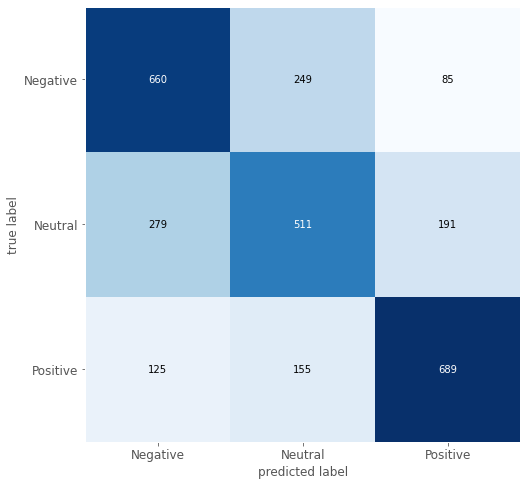

In [215]:
cm  = confusion_matrix(test_y, test_pred)
labels = ['Negative', 'Neutral', 'Positive']
from mlxtend.plotting import plot_confusion_matrix
plt.figure()
plot_confusion_matrix(cm, figsize=(8,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.xticks(range(3), labels, fontsize=12)
plt.yticks(range(3), labels, fontsize=12)
plt.show()